# Covid19 Analyzer
数据分析和展示应包括:

1) 15 天中，全球新冠疫情的总体变化趋势;

2) 15 天中，每日新增确诊数累计排名前 10 个国家的每日新增确诊数据的曲线图;

3) 累计确诊数排名前 10 的国家名称及其数量;

4) 用饼图展示各个国家的累计确诊人数的比例(你爬取的所有国家，数据较小的国家
可以合并处理);

5) 累计确诊人数占国家总人口比例最高的 10 个国家;

6) 疫苗接种情况(至少接种了一针及以上)，请用地图形式展示;

7) 疫苗接种率(累计疫苗接种人数/国家人数)最低的 10 个国家;

8) 全球 GDP 前十名国家的累计确诊人数箱型图，要有平均值;

9) 死亡率最高的 10 个国家;

10) 其它你希望分析和展示的数据。

以上图形应包括完整的坐标、刻度、标签、图例等，如有必要请配上说明文字，对
图中的内容进行解释。

根据以上数据，列出全世界应对新冠疫情最好的 10 个国家，并说明你的理由。

针对全球累计确诊数，利用前 10 天采集到的数据做后 5 天的预测，并与实际数据进行对比。说明你预测的方法，并分析与实际数据的差距和原因。

## 导入数据

In [29]:
import pandas as pd

dfs = []
for i in range(1, 16):
    df = pd.read_csv('./dataFetcher/day' + str(i) + '_data.csv').sort_values('confirmed', ascending=False).reset_index(drop=True)

    # 保存为float便于计算
    df['confirmed'].astype(float)
    df['deceased'].astype(float)
    df['active'].astype(float)
    df['recovered'].astype(float)
    df['vaccinated'].astype(float)
    df['population'].astype(float)

    dfs.append(df)
len_dfs = len(dfs)
print(f'{len_dfs} files imported')

15 files imported


## 计算新增数据

In [30]:
day0_df = pd.read_csv('./dataFetcher/day0_data.csv').sort_values('confirmed', ascending=False).reset_index(drop=True)
day0_df['confirmed'].astype(float)
dfs[0]['new_confirmed'] = dfs[0]['confirmed'] - day0_df['confirmed']

for i in range(1, len_dfs):
    dfs[i]['new_confirmed'] = dfs[i]['confirmed'] - dfs[i - 1]['confirmed']
    print(dfs[i])

                   region    confirmed   deceased      active    recovered  \
0                   World  270999492.0  5327445.0  23574704.0  241806901.0   
1           United States   50970263.0   818982.0  10061096.0   40090185.0   
2                   India   34703508.0   475640.0     97100.0   34130768.0   
3                  Brazil   22191949.0   616980.0    160651.0   21414318.0   
4          United Kingdom   10873468.0   146477.0   1198677.0    9528314.0   
..                    ...          ...        ...         ...          ...   
221                 Tonga          1.0        NaN         NaN          1.0   
222            Micronesia          1.0        NaN         NaN          1.0   
223              Kiribati          NaN        NaN         NaN          NaN   
224  Summer Olympics 2020          NaN        NaN         NaN          NaN   
225                 Spain          NaN        NaN         NaN          NaN   

       vaccinated    population  new_confirmed  
0    4.412349e

## 计算新增排名

In [31]:
accu_nc = pd.DataFrame(dfs[0]['new_confirmed'])
accu_nc.rename(columns={'new_confirmed': 'day1'}, inplace=True)
for i in range(1, len_dfs):
    accu_nc = pd.concat([accu_nc, dfs[i]['new_confirmed']], axis=1)
    accu_nc.rename(columns={'new_confirmed': 'day' + str(i + 1)}, inplace=True)


accu_nc['total'] = 0
for i in range(len_dfs):
    accu_nc['total'] += accu_nc['day' + str(i + 1)]

accu_nc = pd.concat([dfs[0]['region'], accu_nc], axis=1)
accu_nc = accu_nc.sort_values('total', ascending=False).reset_index(drop=True)
print(accu_nc[1:11])

            region     day1      day2      day3      day4      day5      day6  \
1    United States  38784.0  168808.0  165720.0  151584.0  148085.0  174629.0   
2   United Kingdom  48071.0   53953.0   59077.0   77741.0   87565.0   92503.0   
3           France  43848.0   12036.0   63405.0   65713.0   60866.0   58128.0   
4          Germany  29633.0   28804.0   40795.0   55650.0   53057.0   48375.0   
5           Russia  29929.0   29558.0   28343.0   28363.0   28486.0   27743.0   
6        Argentina   1570.0    3512.0    4555.0    4819.0    5301.0    5648.0   
7           Turkey  17956.0   18796.0   21477.0   19872.0   18100.0   18141.0   
8     South Africa  37875.0   13288.0   23857.0   26389.0   24785.0   20713.0   
9            Italy  19212.0   12704.0   20665.0   23190.0   26104.0   28615.0   
10     Netherlands  16588.0   13783.0   12760.0   13469.0   16323.0   15367.0   

       day7     day8      day9     day10     day11     day12     day13  \
1   85924.0  69509.0  264792.0  22

## 计算确诊率/死亡率/疫苗接种率

In [32]:
for df in dfs:
    df['confirmed_rate'] = df['confirmed'] / df['population']
    df['deceased_rate'] = df['deceased'] / df['confirmed']
    df['vaccinated_rate'] = df['vaccinated'] / df['population']
    print(df)

                   region    confirmed   deceased      active    recovered  \
0                   World  270426226.0  5321864.0  23517119.0  241335916.0   
1           United States   50801455.0   817956.0   9979825.0   40003674.0   
2                   India   34694142.0   475434.0     95913.0   34122795.0   
3                  Brazil   22189867.0   616941.0    158608.0   21414318.0   
4          United Kingdom   10819515.0   146439.0   1182669.0    9490407.0   
..                    ...          ...        ...         ...          ...   
221                 Tonga          1.0        NaN         NaN          1.0   
222            Micronesia          1.0        NaN         NaN          1.0   
223              Kiribati          NaN        NaN         NaN          NaN   
224  Summer Olympics 2020          NaN        NaN         NaN          NaN   
225                 Spain          NaN        NaN         NaN          NaN   

       vaccinated    population  new_confirmed  confirmed_rate 

                   region    confirmed   deceased      active    recovered  \
0                   World  274531620.0  5366413.0  24202737.0  244570685.0   
1           United States   51696205.0   827206.0  10353854.0   40515145.0   
2                   India   34738584.0   477170.0     89943.0   34171471.0   
3                  Brazil   22212343.0   617784.0    180241.0   21414318.0   
4          United Kingdom   11279428.0   147173.0   1390401.0    9741854.0   
..                    ...          ...        ...         ...          ...   
221                 Tonga          1.0        NaN         NaN          1.0   
222            Micronesia          1.0        NaN         NaN          1.0   
223              Kiribati          NaN        NaN         NaN          NaN   
224  Summer Olympics 2020          NaN        NaN         NaN          NaN   
225                 Spain          NaN        NaN         NaN          NaN   

       vaccinated    population  new_confirmed  confirmed_rate 

## 计算全球变化趋势

In [33]:
world_confirmed = pd.DataFrame(dfs[0].loc[[0], ['confirmed']])
world_confirmed.rename(columns={'confirmed': 'day1'}, inplace=True)
for i in range(1, len_dfs):
    world_confirmed = pd.concat([world_confirmed, dfs[i].loc[[0], ['confirmed']]], axis=1)
    world_confirmed.rename(columns={'confirmed': 'day' + str(i + 1)}, inplace=True)

world_deceased = pd.DataFrame(dfs[0].loc[[0], ['deceased']])
world_deceased.rename(columns={'deceased': 'day1'}, inplace=True)
for i in range(1, len_dfs):
    world_deceased = pd.concat([world_deceased, dfs[i].loc[[0], ['deceased']]], axis=1)
    world_deceased.rename(columns={'deceased': 'day' + str(i + 1)}, inplace=True)

world_active = pd.DataFrame(dfs[0].loc[[0], ['active']])
world_active.rename(columns={'active': 'day1'}, inplace=True)
for i in range(1, len_dfs):
    world_active = pd.concat([world_active, dfs[i].loc[[0], ['active']]], axis=1)
    world_active.rename(columns={'active': 'day' + str(i + 1)}, inplace=True)

world_recovered = pd.DataFrame(dfs[0].loc[[0], ['recovered']])
world_recovered.rename(columns={'recovered': 'day1'}, inplace=True)
for i in range(1, len_dfs):
    world_recovered = pd.concat([world_recovered, dfs[i].loc[[0], ['recovered']]], axis=1)
    world_recovered.rename(columns={'recovered': 'day' + str(i + 1)}, inplace=True)

world_vaccinated = pd.DataFrame(dfs[0].loc[[0], ['vaccinated']])
world_vaccinated.rename(columns={'vaccinated': 'day1'}, inplace=True)
for i in range(1, len_dfs):
    world_vaccinated = pd.concat([world_vaccinated, dfs[i].loc[[0], ['vaccinated']]], axis=1)
    world_vaccinated.rename(columns={'vaccinated': 'day' + str(i + 1)}, inplace=True)

## 绘图部分

### 15日全球疫情总体变化趋势

In [47]:
import pyecharts.options as opts
from pyecharts.charts import Line
x_data = world_confirmed.columns.values.tolist()

y_confirmed = world_confirmed.loc[0].values.tolist()
y_deceased = world_deceased.loc[0].values.tolist()
y_active = world_active.loc[0].values.tolist()
y_recovered = world_recovered.loc[0].values.tolist()

world_trend = (
    Line()
    .set_global_opts(
        title_opts=opts.TitleOpts(title='15日全球疫情总体变化趋势'),
        tooltip_opts=opts.TooltipOpts(is_show=True),
        xaxis_opts=opts.AxisOpts(type_="category"),
        yaxis_opts=opts.AxisOpts(type_='value')
    )
    .add_xaxis(xaxis_data=x_data)
    .add_yaxis(series_name="累计确诊",
               y_axis=y_confirmed,
               label_opts=opts.LabelOpts(is_show=False),
               is_smooth=True)
    .add_yaxis(series_name='现有确诊',
               y_axis=y_active,
               label_opts=opts.LabelOpts(is_show=False),
               is_smooth=True)
    .add_yaxis(series_name='死亡',
               y_axis=y_deceased,
               label_opts=opts.LabelOpts(is_show=False),
               is_smooth=True)
    .add_yaxis(series_name='治愈',
               y_axis=y_recovered,
               label_opts=opts.LabelOpts(is_show=False),
               is_smooth=True)
)
world_trend.render_notebook()

### 15日新增确诊排名前10国家新增确诊趋势

In [46]:
y_new_confirm = []
regions = accu_nc['region'].values.tolist()[1:]
for i in range(1, 11):
    y_new_confirm.append(accu_nc.loc[i].values.tolist()[1:-1])

top10_nc = (
    Line()
    .set_global_opts(
        title_opts=opts.TitleOpts(title='15日新增确诊排名前10国家新增确诊趋势'),
        tooltip_opts=opts.TooltipOpts(is_show=True),
        xaxis_opts=opts.AxisOpts(type_="category"),
        yaxis_opts=opts.AxisOpts(type_='value'),
        legend_opts=opts.LegendOpts(pos_top='3%')
    )
    .add_xaxis(xaxis_data=x_data)
    .add_yaxis(series_name=regions[0],
               y_axis=y_new_confirm[0],
               label_opts=opts.LabelOpts(is_show=False),
               is_smooth=True)
    .add_yaxis(series_name=regions[1],
               y_axis=y_new_confirm[1],
               label_opts=opts.LabelOpts(is_show=False),
               is_smooth=True)
    .add_yaxis(series_name=regions[2],
               y_axis=y_new_confirm[2],
               label_opts=opts.LabelOpts(is_show=False),
               is_smooth=True)
    .add_yaxis(series_name=regions[3],
               y_axis=y_new_confirm[3],
               label_opts=opts.LabelOpts(is_show=False),
               is_smooth=True)
    .add_yaxis(series_name=regions[4],
               y_axis=y_new_confirm[4],
               label_opts=opts.LabelOpts(is_show=False),
               is_smooth=True)
    .add_yaxis(series_name=regions[5],
               y_axis=y_new_confirm[5],
               label_opts=opts.LabelOpts(is_show=False),
               is_smooth=True)
    .add_yaxis(series_name=regions[6],
               y_axis=y_new_confirm[6],
               label_opts=opts.LabelOpts(is_show=False),
               is_smooth=True)
    .add_yaxis(series_name=regions[7],
               y_axis=y_new_confirm[7],
               label_opts=opts.LabelOpts(is_show=False),
               is_smooth=True)
    .add_yaxis(series_name=regions[8],
               y_axis=y_new_confirm[8],
               label_opts=opts.LabelOpts(is_show=False),
               is_smooth=True)
    .add_yaxis(series_name=regions[9],
               y_axis=y_new_confirm[9],
               label_opts=opts.LabelOpts(is_show=False),
               is_smooth=True)
)
top10_nc.render_notebook()

### 累计确诊数排名前 10 的国家名称及其数量

In [36]:
from pyecharts.charts import Bar

regions = dfs[-1]['region'].values.tolist()[1:11]
c_data = dfs[-1]['confirmed'].values.tolist()[1:11]

top10_c = (
    Bar()
    .set_global_opts(
        title_opts=opts.TitleOpts(title='累计确诊排名前10国家'),
        tooltip_opts=opts.TooltipOpts(is_show=False),
        xaxis_opts=opts.AxisOpts(type_="category", axislabel_opts=opts.LabelOpts(rotate=-15)),
        yaxis_opts=opts.AxisOpts(type_='value')
    )
    .add_xaxis(regions)
    .add_yaxis(series_name='确诊人数',
               y_axis=c_data)
)
top10_c.render_notebook()

### 各国累计确诊人数占全球确诊人数比例

In [37]:
from pyecharts.charts import Pie
from pyecharts.commons.utils import JsCode
import math

regions = dfs[-1]['region'].values.tolist()[1:24]
regions.append('others')
nc_data = dfs[-1]['confirmed'].values.tolist()
t = []
for i in nc_data[24:]:
    if not math.isnan(i):
        t.append(i)
nc_data = nc_data[1:24]
nc_data.append(sum(t))

nc_pie = (
    Pie()
    .set_global_opts(
        title_opts=opts.TitleOpts(title='各国累计确诊人数占全球确诊人数比例'),
        legend_opts=opts.LegendOpts(pos_left='left', pos_top='8%', orient='vertical')
    )
    .add('', [list(z) for z in zip(regions, nc_data)], center=['60%', '45%'])
    .set_series_opts(label_opts=opts.LabelOpts(formatter='{b}: {d}%'))
)
nc_pie.render_notebook()

### 累计确诊人数占国家总人口比例最高的 10 个国家

In [44]:
top10_cr_data = dfs[-1].sort_values('confirmed_rate', ascending=False).reset_index(drop=True)

regions = top10_cr_data['region'].values.tolist()[1:11]
c_data = top10_cr_data['confirmed'].values.tolist()[1:11]
pop_data = top10_cr_data['population'].values.tolist()[1:11]
cr_data = top10_cr_data['confirmed_rate'].values.tolist()[1:11]

y_c = []
y_nc = []
for i in range(10):
    y_c.append({'value': c_data[i], 'percent': cr_data[i]})
    y_nc.append({'value': pop_data[i] - c_data[i], 'percent': 1 - cr_data[i]})

top10_cr = (
    Bar()
    .add_xaxis(xaxis_data=regions)
    .add_yaxis('确诊', y_c, stack='stack1', category_gap='70%', label_opts=opts.LabelOpts(
        position='right',
        formatter=JsCode(
            "function(x){return Number(x.data.percent * 100).toFixed() + '%';}"
        )
    ))
    .add_yaxis('未确诊', y_nc, stack='stack1', category_gap='70%', label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        title_opts=opts.TitleOpts(title='确诊率前10国家'),
        tooltip_opts=opts.TooltipOpts(is_show=True),
        xaxis_opts=opts.AxisOpts(type_="category", axislabel_opts=opts.LabelOpts(rotate=-15))
    )
)
top10_cr.render_notebook()

### 疫苗接种情况
#### 接种人数

In [39]:
from pyecharts.charts import Map

regions = dfs[-1]['region'].values.tolist()
v_data = dfs[-1]['vaccinated'].values.tolist()
v_r_data = dfs[-1]['vaccinated_rate'].values.tolist()

v_pop = (
    Map()
    .add(
        series_name='接种人数', 
        data_pair=[list(z) for z in zip(regions, v_data)], 
        maptype='world', 
        is_map_symbol_show=False
    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        title_opts=opts.TitleOpts(title='疫苗接种人数'),
        visualmap_opts=opts.VisualMapOpts(max_=100000000, min_=10000)
    )
)
v_pop.render_notebook()



#### 接种率

In [40]:
v_rate = (
    Map()
    .add(
        series_name='接种率', 
        data_pair=[list(z) for z in zip(regions, v_r_data)], 
        maptype='world', 
        is_map_symbol_show=False
    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        title_opts=opts.TitleOpts(title='疫苗接种率'),
        visualmap_opts=opts.VisualMapOpts(max_=1, min_=0, precision=2)
    )
)
v_rate.render_notebook()


### 疫苗接种率最低的10个国家

In [41]:
v_data = dfs[-1].sort_values('vaccinated_rate').reset_index(drop=True)
v_data['vaccinated_rate'] = v_data['vaccinated_rate'].map(lambda x: x * 100)
regions = v_data['region'].values.tolist()[:10]
v_data = v_data['vaccinated_rate'].values.tolist()[:10]

v_rate = (
    Bar()
    .add_xaxis(xaxis_data=regions)
    .add_yaxis(series_name='疫苗接种率', y_axis=v_data, label_opts=opts.LabelOpts(
        position='top',
        formatter=JsCode(
            "function(x){return Number(x.data).toFixed(2) + '%';}"
        )
    ))
    .set_global_opts(
        title_opts=opts.TitleOpts(title='疫苗接种率最低的10个国家'),
        xaxis_opts=opts.AxisOpts(type_="category", axislabel_opts=opts.LabelOpts(rotate=-15))
    )
)
v_rate.render_notebook()

### 全球 GDP 前十名国家的累计确诊人数箱型图

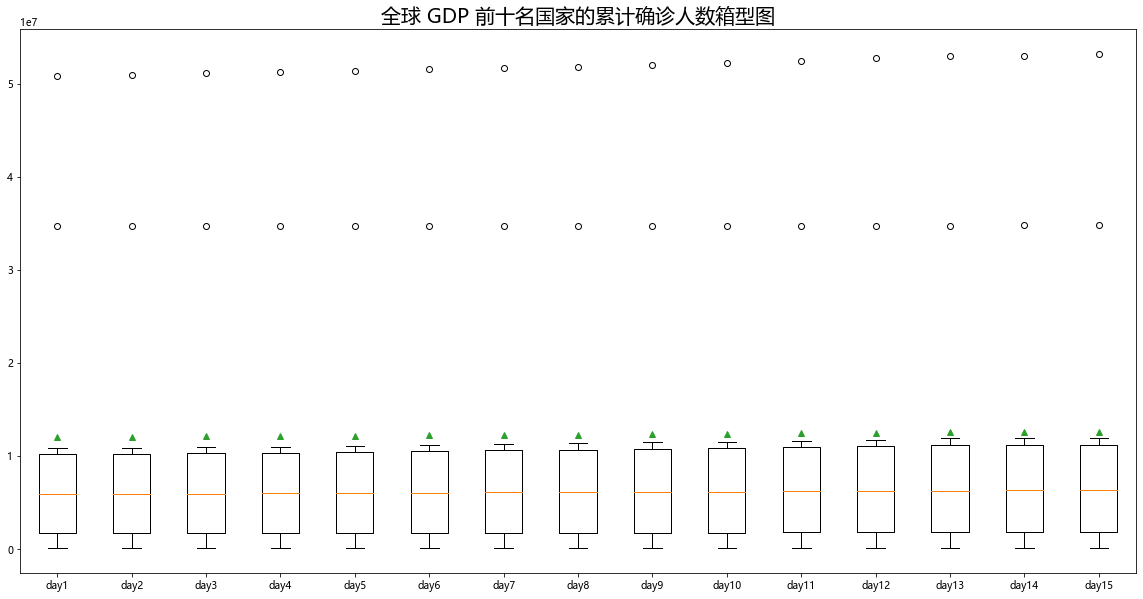

In [50]:
import matplotlib.pyplot as plt

regions = ['United States', 'China', 'Japan', 'Germany', 'United Kingdom', 'India', 'France', 'Italy', 'Canada', 'South Korea']

c_data = []

for i in range(len_dfs):
    t = []
    for region in regions:
        t.append(dfs[i].loc[dfs[i]['region'] == region]['confirmed'].values.tolist()[0])
        t.sort()
    c_data.append(t)

plt.figure(figsize=(20, 10))
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.title('全球 GDP 前十名国家的累计确诊人数箱型图', size=20)
plt.boxplot(c_data, labels=['day' + str(i) for i in range(1, len_dfs + 1)], showmeans=True)
plt.show()

### 死亡率最高的 10 个国家

In [43]:
d_data = dfs[-1].sort_values('deceased_rate', ascending=False).reset_index(drop=True)
d_data['deceased_rate'] = d_data['deceased_rate'].map(lambda x: x * 100)
regions = d_data['region'].values.tolist()[:10]
d_data = d_data['deceased_rate'].values.tolist()[:10]

d_rate = (
    Bar()
    .add_xaxis(xaxis_data=regions)
    .add_yaxis(series_name='死亡率', y_axis=d_data, label_opts=opts.LabelOpts(
        position='top',
        formatter=JsCode(
            "function(x){return Number(x.data).toFixed(2) + '%';}"
        )
    ))
    .set_global_opts(
        title_opts=opts.TitleOpts(title='死亡率最高的10个国家'),
        xaxis_opts=opts.AxisOpts(type_="category", axislabel_opts=opts.LabelOpts(rotate=-15))
    )
)
d_rate.render_notebook()